In [1]:
import os


In [2]:
import numpy

In [11]:
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
# Keras libraries and packages
import keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU,ELU

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA


In [25]:
df  = pd.read_csv('E:\python files\DEEp_learning\ANN\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.shape

(10000, 14)

In [28]:
x = df.iloc[:,3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [34]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [37]:
geography = pd.get_dummies(df['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [38]:
gender = pd.get_dummies(df['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [39]:
x = pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [41]:
# Now have to drop old Geography and Gender

x =x.drop(['Geography','Gender'],axis=1)
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [42]:
x.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train[:5]

array([[ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
         0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
        -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, -0.00631193, -0.92159124,
         0.64259497,  0.9687384 , -0.74866447,  1.75486502, -0.57369368,
         0.91601335],
       [-1.19119591, -0.94312892, -1.031415  ,  0.57993469, -0.92159124,
         0.64259497, -1.03227043,  1.48533467, -0.5698444 , -0.57369368,
        -1.09168714],
       [ 0.03556578,  0.10961719,  0.00666099,  0.47312769, -0.92159124,
         0.64259497, -1.03227043,  1.27652776, -0.5698444 ,  1.74309049,
         0.91601335],
       [ 2.05611444,  1.73658844,  1.04473698,  0.8101927 ,  0.8095029 ,
         0.64259497,  0.9687384 ,  0.55837842, -0.5698444 ,  1.74309049,
        -1.09168714]])

In [46]:
x_test[:5]

array([[-0.55204276, -0.36890377,  1.04473698,  0.8793029 , -0.92159124,
         0.64259497,  0.9687384 ,  1.61085707,  1.75486502, -0.57369368,
        -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  ,  0.42972196, -0.92159124,
         0.64259497, -1.03227043,  0.49587037, -0.5698444 , -0.57369368,
        -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698,  0.30858264, -0.92159124,
         0.64259497,  0.9687384 , -0.42478674, -0.5698444 ,  1.74309049,
        -1.09168714],
       [ 1.41696129, -0.65601634, -0.33936434,  0.57533623, -0.92159124,
        -1.55619021, -1.03227043, -0.18777657, -0.5698444 , -0.57369368,
         0.91601335],
       [ 0.57162971, -0.08179119,  0.00666099,  1.38961097,  0.8095029 ,
         0.64259497,  0.9687384 ,  0.61684179,  1.75486502, -0.57369368,
         0.91601335]])

In [47]:
# Initializing ANN

classifier = Sequential()



In [50]:
# Adding the input layer and the first hidden layer
classifier.add(units=6,kernel_initializer = 'he_uniform', activation ='relu',input_dim=11))

C:\Users\Ganguly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [52]:
# Adding the second hidden layer

classifier.add(Dense(units =6,kernel_initializer = 'he_uniform', activation ='relu'))

In [59]:
#Adding the output layer
classifier.add(Dense(output_dim=1,kernel_initializer = 'glorot_uniform', activation ='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 240
Trainable params: 240
Non-trainable params: 0
________________________________________________________

C:\Users\Ganguly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="sigmoid", units=1)`
  


In [61]:
# Compiling the ANN
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics =['accuracy'])

In [62]:
#Fitting the ANN to the training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)


C:\Users\Ganguly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 634us/step - loss: 0.5104 - accuracy: 0.7962 - val_loss: 0.4735 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.4547 - accuracy: 0.7962 - val_loss: 0.4490 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 167us/step - loss: 0.4382 - accuracy: 0.7970 - val_loss: 0.4419 - val_accuracy: 0.8001
Epoch 4/100
5359/5359 [==============================] - 1s 240us/step - loss: 0.4303 - accuracy: 0.8123 - val_loss: 0.4377 - val_accuracy: 0.8054
Epoch 5/100
5359/5359 [==============================] - 2s 286us/step - loss: 0.4251 - accuracy: 0.8097 - val_loss: 0.4333 - val_accuracy: 0.8114
Epoch 6/100
5359/5359 [==============================] - 2s 291us/step - loss: 0.4191 - accuracy: 0.8147 - val_loss: 0.4303 - val_accuracy: 0.8129
Epoch 7/100
5359/5359 [==============================] - 1s 181us/step

In [64]:
model_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

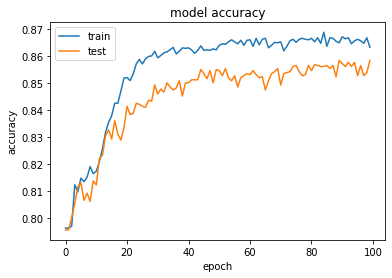

In [70]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

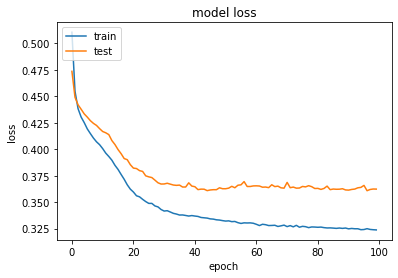

In [71]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
# Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred[:15]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [75]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[1506,   89],
       [ 195,  210]], dtype=int64)

In [76]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.858